In [2]:
print("mahesh")

mahesh


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [5]:
df.shape


(847, 2)

In [6]:
print(f"Date range of gold price available from {df.loc[0, 'Date']} to {df.loc[len(df)-1, 'Date']}")


Date range of gold price available from 1950-01 to 2020-07


In [7]:
date=pd.date_range(start='1/1/1950', end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [8]:
df["month"]=date
df.drop('Date', axis=1,inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


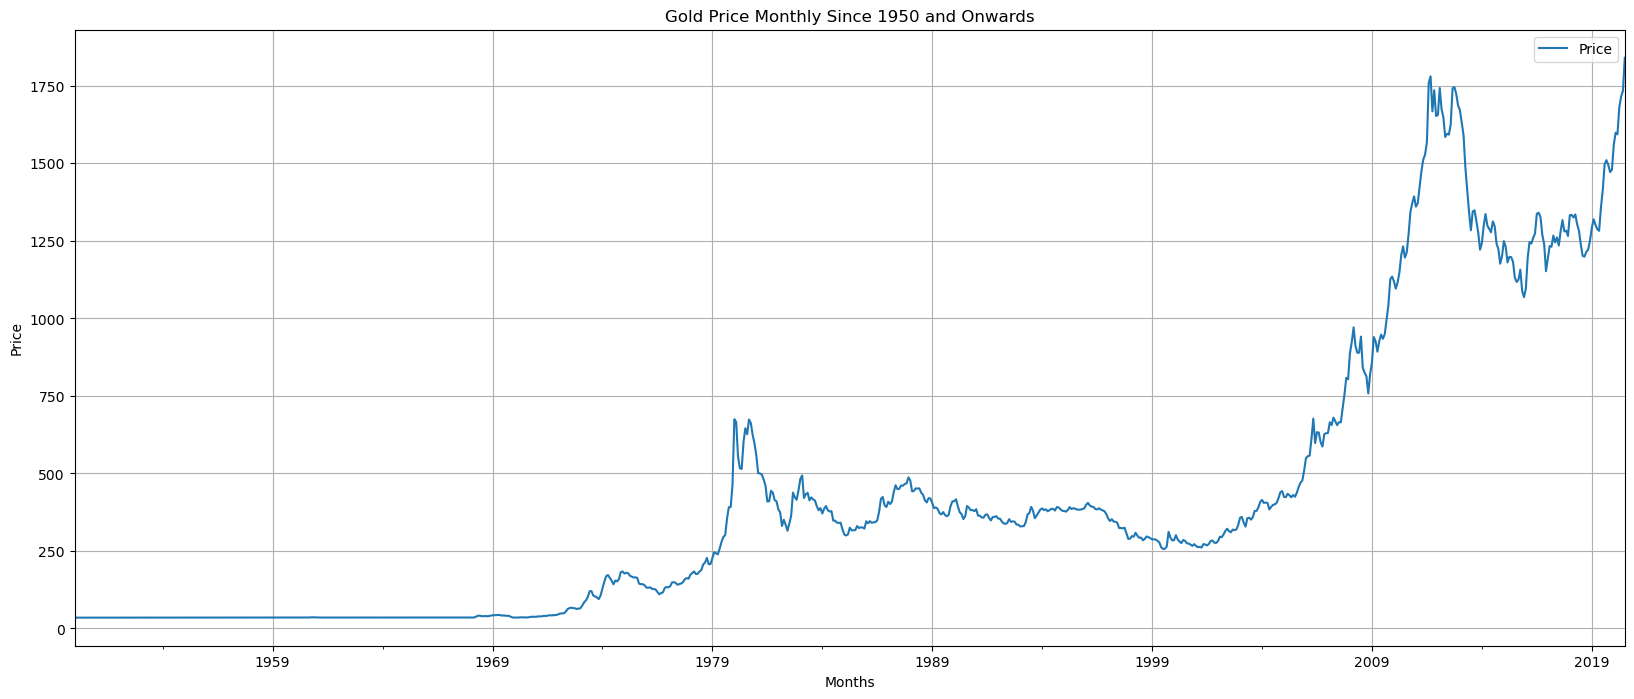

In [10]:
df.plot(figsize=(20,8))
plt.title("Gold Price Monthly Since 1950 and Onwards")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [11]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


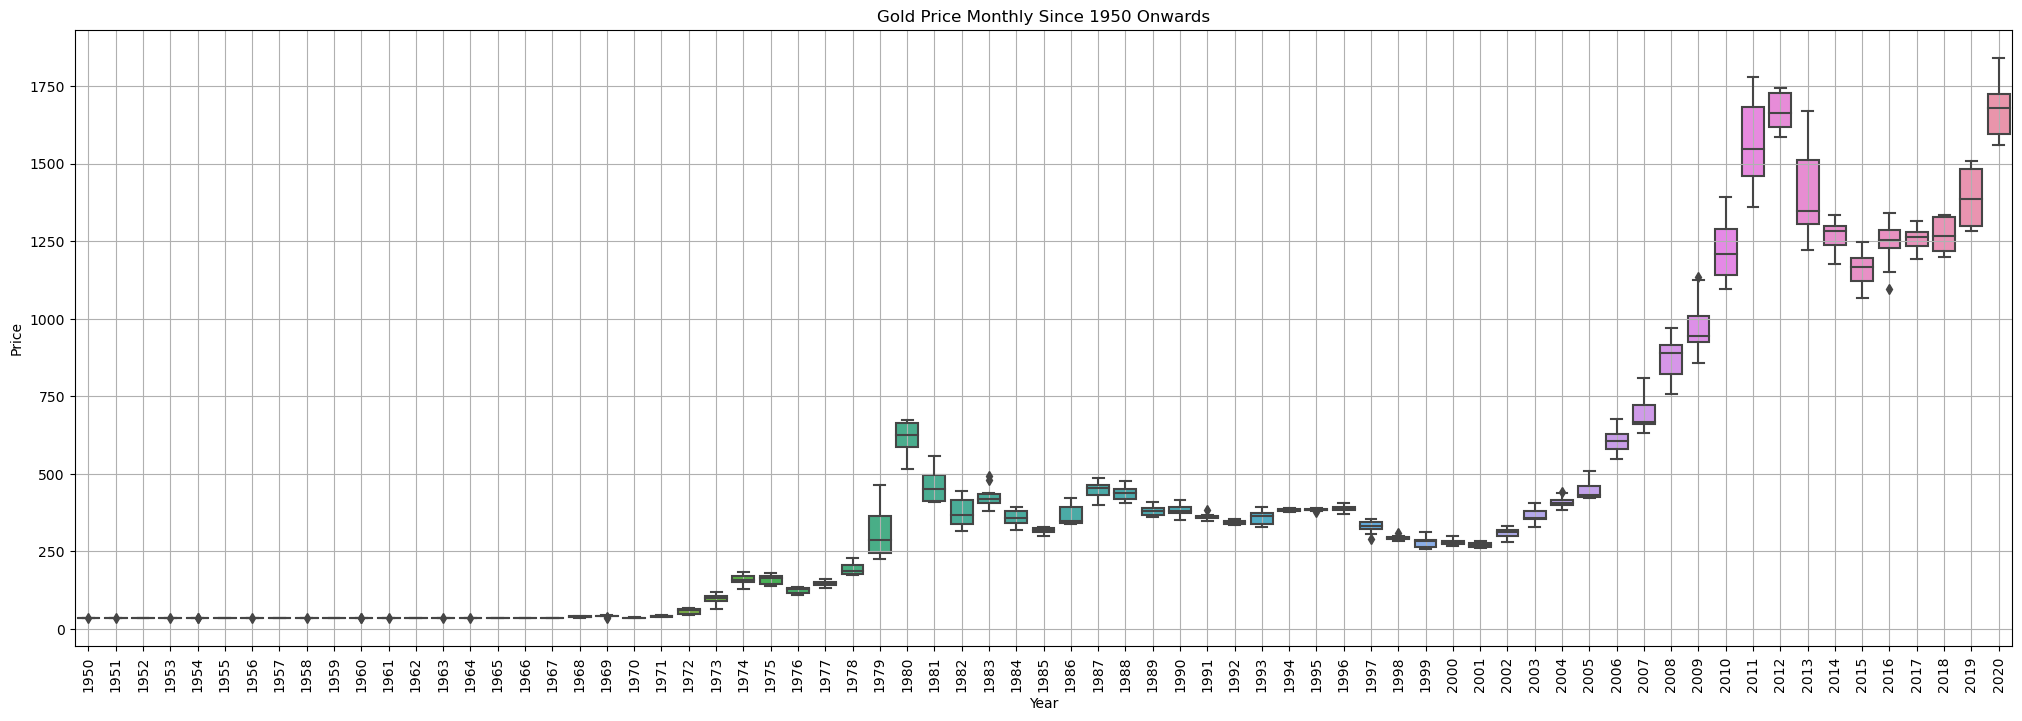

In [12]:
_, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x=df.index.year, y=df.iloc[:, 0], ax=ax)
plt.title('Gold Price Monthly Since 1950 Onwards')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
         

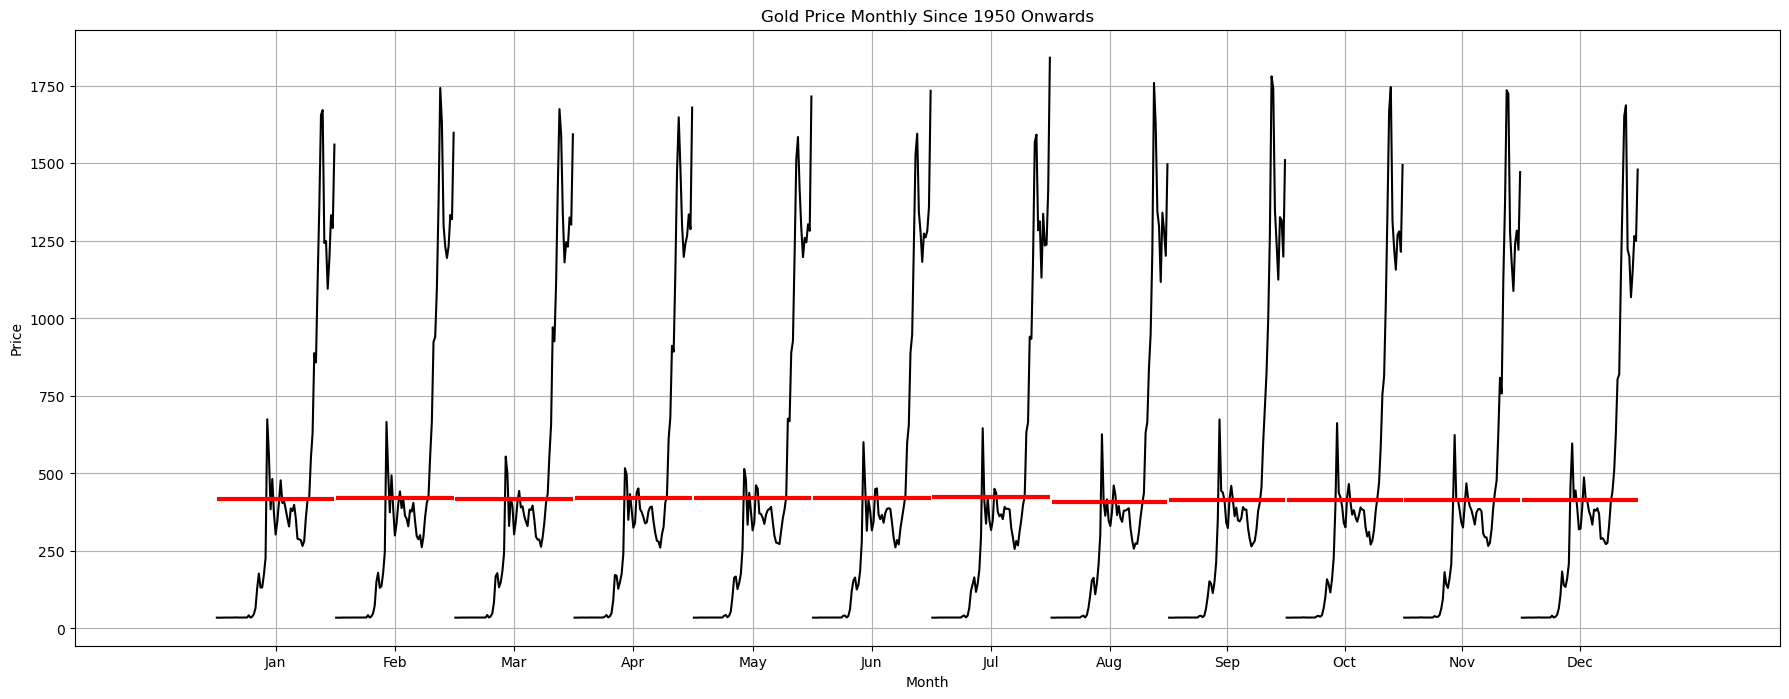

In [13]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22, 8))
month_plot(df, ylabel='Gold Price', ax=ax)
plt.title('Gold Price Monthly Since 1950 Onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.show()


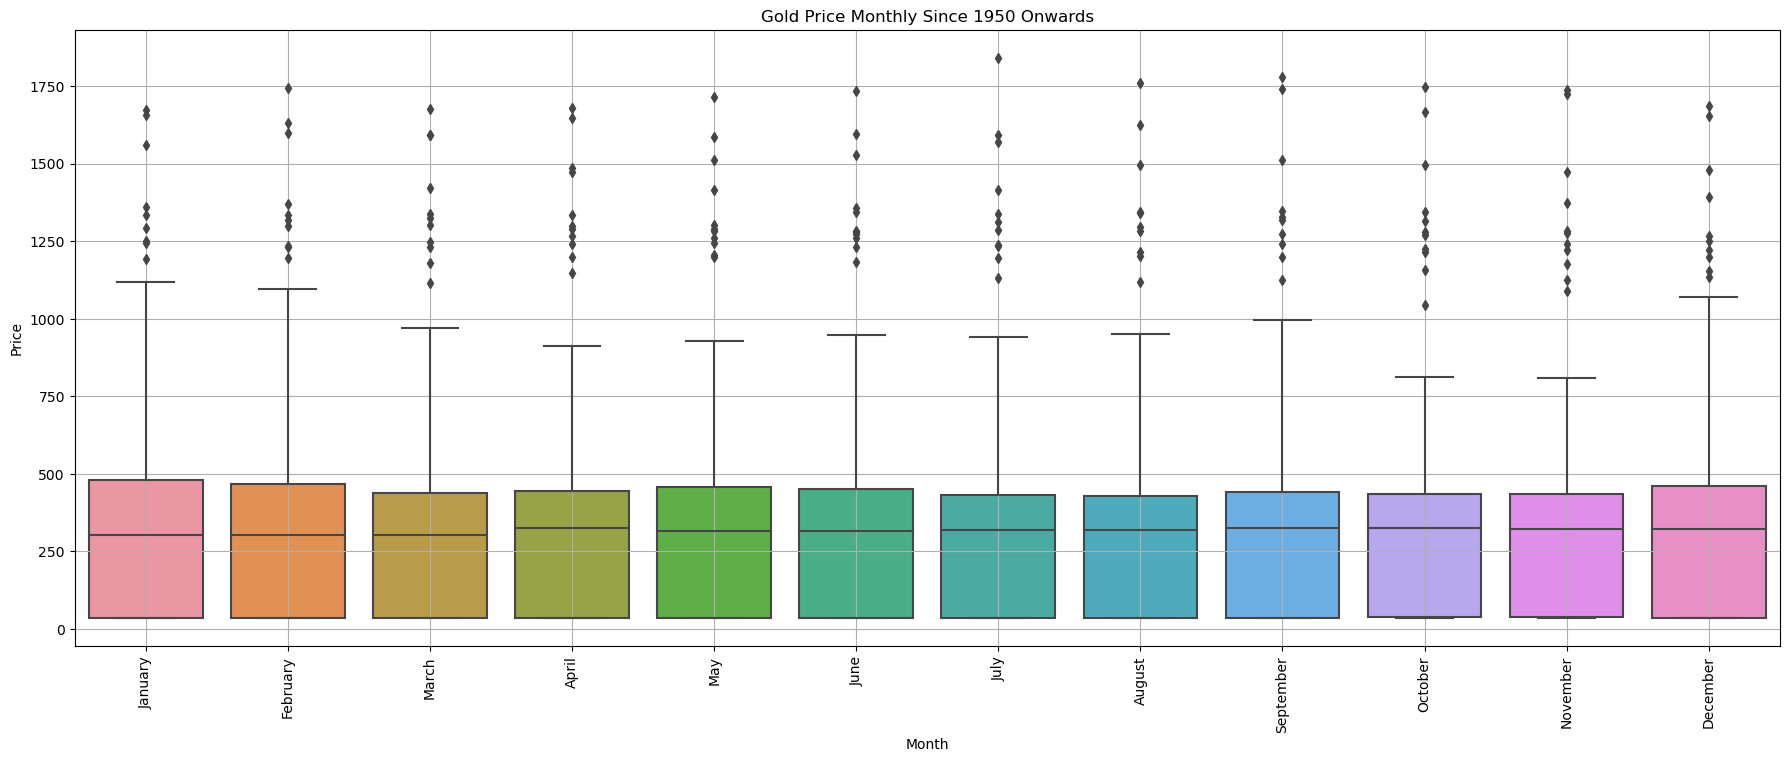

In [15]:
_, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df.index.month_name(), y=df.values[:, 0], ax=ax)
plt.title('Gold Price Monthly Since 1950 Onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


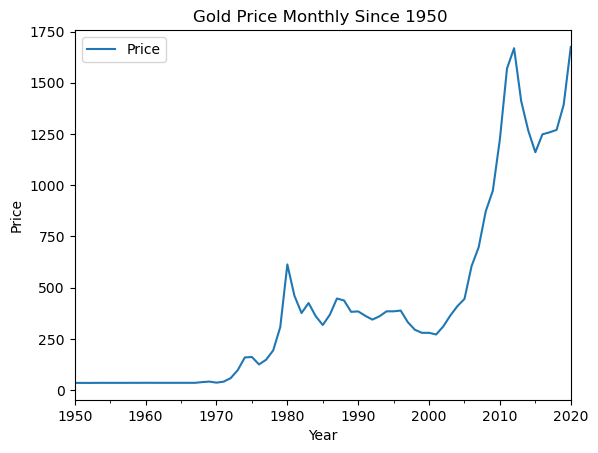

In [16]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot();
plt.title('Gold Price Monthly Since 1950 ')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

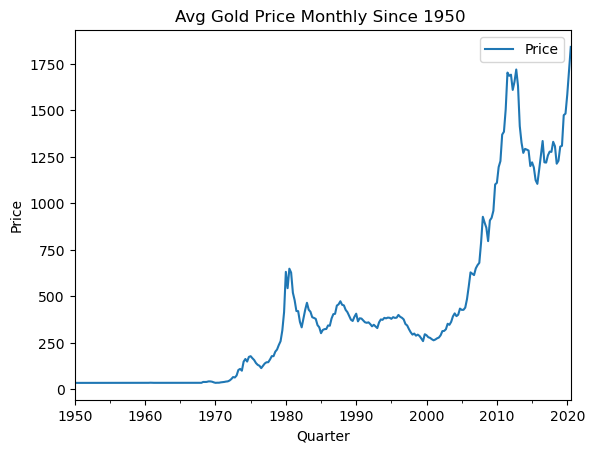

In [17]:
df_yearly_sum=df.resample('Q').mean()
df_yearly_sum.plot();
plt.title('Avg Gold Price Monthly Since 1950 ')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.show()

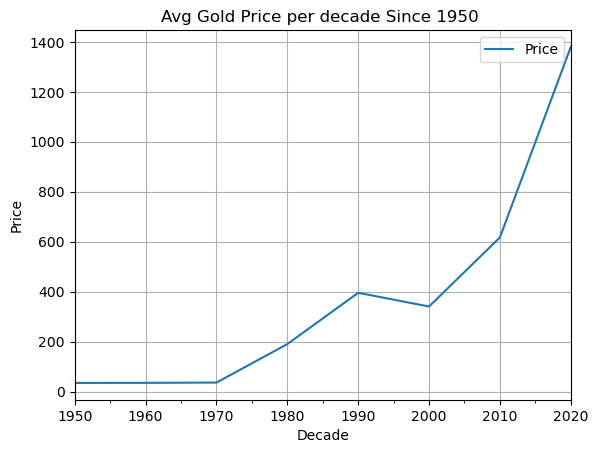

In [20]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('Avg Gold Price per decade Since 1950 ')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()


In [21]:
# Calculate mean price per year and rename the column to 'Mean'
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})

# Calculate standard deviation per year and merge with the mean DataFrame
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'std'}), left_index=True, right_index=True)

# Calculate coefficient of variation percentage and add it to the DataFrame
df_1['Cov_pct'] = ((df_1['std'] / df_1['Mean']) * 100).round(2)

# Display the first few rows of the resulting DataFrame
df_1.head()


,Mean,std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


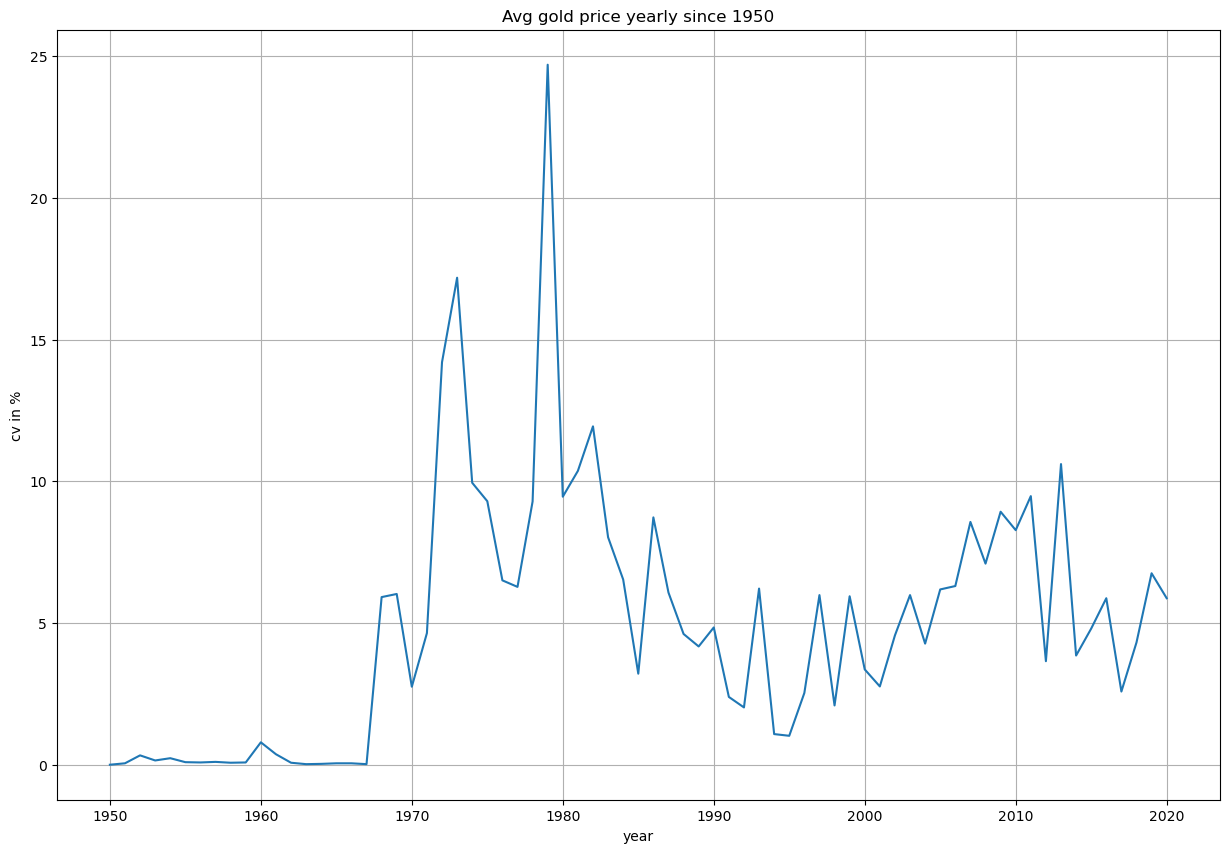

In [22]:
fig,ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot();
plt.title("Avg gold price yearly since 1950")
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid()

In [23]:
train = df[df.index.year <= 2015]

test = df[df.index.year > 2015]


In [26]:
print(train.shape)
print(test.shape)


(792, 1)
(55, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

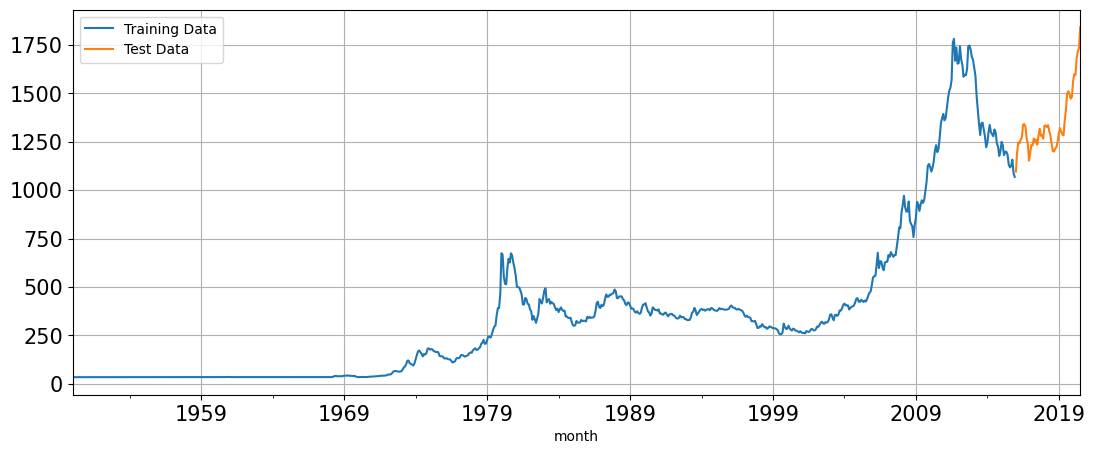

In [29]:
train["Price"].plot(figsize=(13,5),fontsize=15)
test["Price"].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show

In [31]:
train_time = [i + 1 for i in range(len(train))]
test_time = [i + len(train) + 1 for i in range(len(test))]
len(train_time), len(test_time)


(792, 55)

In [32]:
LR_train=train.copy()
LR_test=test.copy()

In [40]:
train_time = [i+1 for i in range(len(LR_train))]
LR_train['time'] = train_time

